# Implement

In [1]:
from project import Projection
from Problem import Problem
from main import run_experiment
from utils import visualize_pareto_front

In [2]:
import autograd.numpy as np
from autograd import jacobian
from scipy.optimize import Bounds
import matplotlib.pyplot as plt
import pandas as pd

# Define

In [3]:
def f(x):
    return np.array([
        4*x[0]**2 + 4*x[1]**2,
        (x[0] - 5)**2 + (x[1] - 5)**2
    ])


#--------------- C --------------------#
def c1(x):
    return -(x[0] - 5)**2 - x[1]**2 + 25
def c2(x):
    return -(x[0] - 8)**2 - (x[1] + 3)**2 + 17.7


#--------------- Q --------------------#
def q1(y):
    return 50**2 - (y[0] - 50)**2 - (y[1] - 50)**2

def q_plus(y):
    center = 50.0
    radius_sq = 50**2  
    
    dx = np.maximum(0, y[0] - center)
    dy = np.maximum(0, y[1] - center)
    return radius_sq - (dx**2 + dy**2)

# Hàm dùng cho Projection 
cons_C = (
    {
        'type': 'ineq', 'fun' : c1,     
    },
    {
        'type': 'ineq', 'fun' : c2,     
    }
)

dim_x = 2
bounds_x = Bounds([-15,-15],[30, 30])

cons_Q = (
    {
        'type': 'ineq', 'fun' : q1,     
    },    
)

cons_Qplus = (
    {'type': 'ineq', 'fun': q_plus},
)
dim_y = 2

In [4]:
# Setup Projections
proj_C_handler = Projection(cons=cons_C, bounds=bounds_x, dim=dim_x, proj_type='euclid')
proj_Q_handler = Projection(cons=cons_Q, bounds=None, dim=dim_y, proj_type='qplus')

# Setup Problem
prob = Problem(
    f=[f], jac_f=[jacobian(f)], C=[], Q=[], 
    dim_x=dim_x, dim_y=dim_y,
    proj_C=proj_C_handler.project,
    proj_Qplus=proj_Q_handler.project
)

In [5]:
results = run_experiment(prob)

=== BẮT ĐẦU PHASE 1: TÌM ĐIỂM KHẢ THI ===


  2%|▏         | 1/50 [00:00<00:00, 102.94it/s]


Hội tụ tại vòng lặp 1
-> Điểm khả thi (Feasible Point): [ 3.83455669 -2.40916813]
=== TÌM GIỚI HẠN PARETO: OPTIM 1 OBJ CỦA F ===


Chiều 0: 75.23572644283304
Chiều 1: 25.504398739626694

=== BẮT ĐẦU PHASE 2: SCALARIZATION (MULTI-RAY) ===
Running Ray 1/25: [1. 0.]
Running Ray 2/25: [0.99785892 0.06540313]
Running Ray 3/25: [0.99144486 0.13052619]
Running Ray 4/25: [0.98078528 0.19509032]
Running Ray 5/25: [0.96592583 0.25881905]
Running Ray 6/25: [0.94693013 0.32143947]
Running Ray 7/25: [0.92387953 0.38268343]
Running Ray 8/25: [0.89687274 0.44228869]
Running Ray 9/25: [0.8660254 0.5      ]
Running Ray 10/25: [0.83146961 0.55557023]
Running Ray 11/25: [0.79335334 0.60876143]
Running Ray 12/25: [0.75183981 0.65934582]
Running Ray 13/25: [0.70710678 0.70710678]
Running Ray 14/25: [0.65934582 0.75183981]
Running Ray 15/25: [0.60876143 0.79335334]
Running Ray 16/25: [0.55557023 0.83146961]
Running Ray 17/25: [0.5       0.8660254]
Running Ray 18/25: [0.44228869 0.89687274]
Running Ray 19/25: [0.38268343 0.92387953]
Running Ray 20/25: [0.32143947 0.94693013]
Running Ray 21/25: [0.25881905 0.96592583]
Running Ray 22/25: 

In [6]:
pf_true_targets = np.load('tmp/pf_true.npy')
pf_ref_cloud = np.load('tmp/pf.npy')

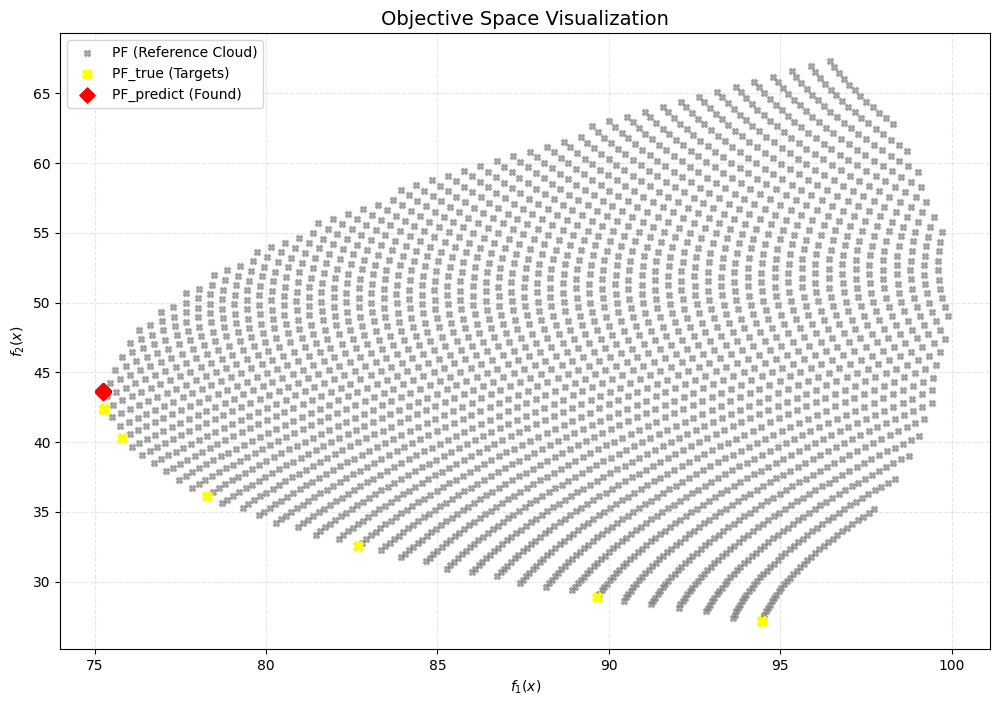

In [7]:
visualize_pareto_front(
    pf_pred=results["pareto_f"], 
    pf_cloud=pf_ref_cloud,   
    pf_targets=pf_true_targets,
    title="Objective Space Visualization",
    figsize=(12, 8)
)